In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("jobs.data")
print("Rows, Columns:", df.shape)


Rows, Columns: (10000, 9)


In [39]:
print(df.head())
print(df.info())


   job_id                  job_title           industry   location  \
0       1         Quantum Researcher  Quantum Computing  Singapore   
1       2  Renewable Energy Engineer         Green Tech  Singapore   
2       3         Quantum Researcher  Quantum Computing      Tokyo   
3       4     Sustainability Analyst         Green Tech  Singapore   
4       5    Smart Contract Engineer         Blockchain     London   

   salary_usd                         skills_required remote_option  \
0      175780      Linear Algebra, Quantum Algorithms            No   
1      137481  Climate Data Analysis, Energy Modeling           Yes   
2      182081                  Linear Algebra, Qiskit            No   
3      113822  Climate Data Analysis, Energy Modeling            No   
4       92575                          Rust, Solidity           Yes   

  company_size posting_date  salary_group  
0        Large   2025-07-22           1.0  
1        Large   2025-09-26           1.0  
2       Medium   202

skills_required
 climate data analysis    1255
energy modeling           1255
climate data analysis     1235
 energy modeling          1235
ethereum                   871
 solidity                  861
quantum algorithms         859
 qiskit                    859
 tensorflow                850
python                     843
Name: count, dtype: int64


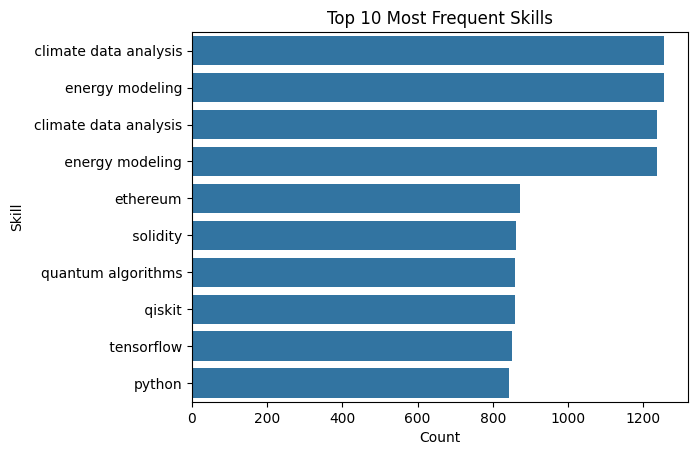

In [3]:
skills = df.skills_required.dropna()
skills = skills.str.lower()
skills = skills.str.split(",")
skills = skills.explode()


top_skills = skills.value_counts().head(10)

print(top_skills)

sns.barplot(x=top_skills.values, y=top_skills.index)
plt.title("Top 10 Most Frequent Skills")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()



In [4]:

skills = df.skills_required.dropna()
skills = skills.str.lower()
skills = skills.str.split(",")
skills = skills.explode()
skills = skills.str.strip()

job_skills = df.loc[skills.index, "job_title"]
skills_df = job_skills.to_frame()
skills_df["skill"] = skills.values

skill_counts = skills_df.groupby("job_title").skill.value_counts()

top_skills_per_job = skill_counts.groupby(level=0).head(5)

print(top_skills_per_job)


job_title                   skill                
AI Engineer                 pytorch                   582
                            tensorflow                580
                            python                    564
Blockchain Developer        rust                      832
                            ethereum                  830
                            solidity                  826
Data Scientist              tensorflow                570
                            python                    544
                            pytorch                   520
ML Researcher               python                    549
                            tensorflow                540
                            pytorch                   535
Quantum Researcher          quantum algorithms        840
                            linear algebra            831
                            qiskit                    811
Quantum Software Developer  qiskit                    871
                      

In [5]:
avg_salary = df.groupby("job_title").salary_usd.mean()
print(avg_salary.sort_values(ascending=False).head())


job_title
Quantum Software Developer    151499.841941
ML Researcher                 151284.985222
Sustainability Analyst        150991.592563
Data Scientist                150990.363525
Smart Contract Engineer       150779.203187
Name: salary_usd, dtype: float64


In [28]:
for remote_status in ['Yes', 'No']:
    filtered = df[(df['remote_option'] == remote_status) & (df['salary_usd'] >= 100000)]
    ai_count = filtered.job_title.str.contains("ai|machine learning", case=False).sum()
    
    print(f"\nRemote: {remote_status}")
    print(f"Total jobs: {len(filtered)}")
    print(f"AI/ML jobs: {ai_count} ({ai_count/len(filtered)*100:.1f}%)")


Remote: Yes
Total jobs: 3800
AI/ML jobs: 1253 (33.0%)

Remote: No
Total jobs: 3723
AI/ML jobs: 1270 (34.1%)


In [ ]:
counts = df.groupby(["location", "industry"]).size().reset_index(name="count")

totals = df.groupby("location").size().reset_index(name="total")

prob = counts.merge(totals, on="location")
prob["probability"] = prob["count"] / prob["total"]

print(prob.sort_values("count", ascending=False).head())

     location           industry  count  total  probability
11     London  Quantum Computing    444   1656     0.268116
17  Singapore         Blockchain    432   1682     0.256837
16  Singapore                 AI    429   1682     0.255054
4       Dubai                 AI    429   1660     0.258434
14   New York         Green Tech    429   1689     0.253996


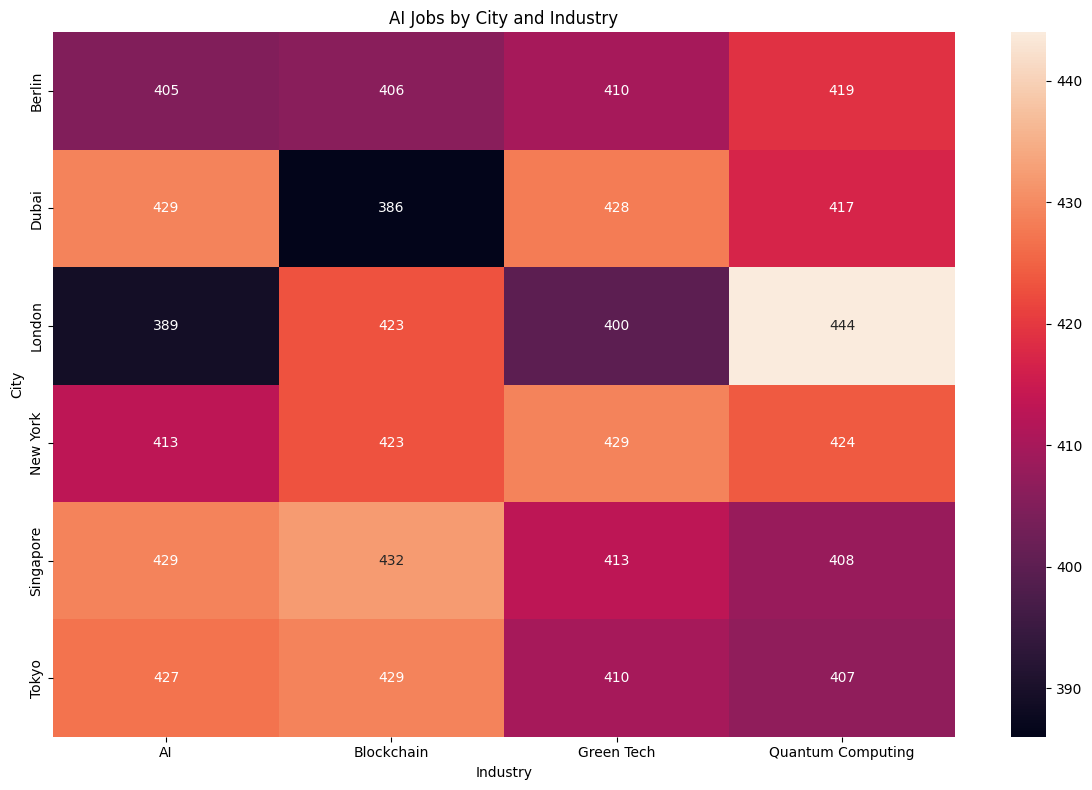

In [37]:
heatmap_data = df.groupby("location")["industry"].value_counts()
heatmap_data = heatmap_data.unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d"
)

plt.title("AI Jobs by City and Industry")
plt.xlabel("Industry")
plt.ylabel("City")
plt.tight_layout()
plt.show()

In [10]:
import numpy as np

salaries = df.salary_usd.dropna().to_numpy()

print("Average salary:", np.mean(salaries))
print("Median salary:", np.median(salaries))
print("Max salary:", np.max(salaries))
print("Minim salary:", np.min(salaries))


Average salary: 150131.5248
Median salary: 150398.5
Max salary: 249990
Minim salary: 50013


In [ ]:
from sklearn.cluster import KMeans

salaries = df[["salary_usd"]].dropna()
df.loc[salaries.index, "salary_group"] = KMeans(n_clusters=3, random_state=42).fit_predict(salaries)


print(df.salary_group.value_counts())
df.groupby("salary_group")["salary_usd"].agg(["min", "mean", "max"]).sort_values("mean")

salary_group
1.0    3432
0.0    3338
2.0    3230
Name: count, dtype: int64


,min,mean,max
salary_group,,,
0.0,50013,83649.136908,117795
1.0,117860,151569.841783,184679
2.0,184693,217308.585759,249990
